# Analyze Torchvision Datasets
This tutorial shows how you can quickly analyze datasets from Torchvision for issues.

<!--<badge>--><a href="https://colab.research.google.com/github/visual-layer/vl-datasets/blob/places/notebooks/analyze-torchvision-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

## Installation

In [1]:
!pip install torchvision fastdup -U

## Download dataset from torchvision

In [2]:
import os
from torchvision.datasets import CIFAR10

# Load the CIFAR10 dataset
cifar10_train = CIFAR10(root='./', train=True, download=True)

Files already downloaded and verified


## Convert Dataset to Images
The downloaded dataset are in binary format. Let's convert them into images and save the in our local directory.

The resulting directory should look like this

```
cifar10-dataset/
    ├── airplane
    |    ├── 0001.JPEG
    |    └── 0002.JPEG
    ├── automobile
    ├── bird
    ├── cat
    ├── deer
    ├── dog
    ├── frog
    ├── horse
    ├── ship
    └── truck
```

In [3]:
# Define the base directory
base_dir = './cifar10-dataset'

# Define a dictionary to map class labels to their names
label_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Iterate over the CIFAR10 images and save them in the appropriate directory
for i in range(len(cifar10_train)):
    image, label = cifar10_train[i]

    # Get the name of the current image's class
    class_name = label_names[label]

    # Create the directory for the current image's class if it doesn't exist
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Save the image using the ImageNet file naming convention
    img_filename = str(i).zfill(8) + '.JPEG'
    img_path = os.path.join(class_dir, img_filename)
    image.save(img_path)

## Construct Annotation DataFrame
fastdup expects the annotations of the dataset to be in a certain dataframe format.

In [4]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

,filename,label,split
0,./cifar10-dataset/horse/00018051.JPEG,horse,train
1,./cifar10-dataset/horse/00004510.JPEG,horse,train
2,./cifar10-dataset/horse/00007621.JPEG,horse,train
3,./cifar10-dataset/horse/00030761.JPEG,horse,train
4,./cifar10-dataset/horse/00038236.JPEG,horse,train
...,...,...,...
49995,./cifar10-dataset/ship/00019829.JPEG,ship,train
49996,./cifar10-dataset/ship/00029826.JPEG,ship,train
49997,./cifar10-dataset/ship/00027496.JPEG,ship,train
49998,./cifar10-dataset/ship/00039263.JPEG,ship,train


## Import and run fastdup

In [5]:
import fastdup
fastdup.__version__

'0.915'

In [6]:
fd = fastdup.create("report/", "cifar10-dataset/")
fd.run(annotations=df, overwrite=True, num_images=5000)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-13 12:01:59 [INFO] Going to loop over dir cifar10-dataset
2023-04-13 12:01:59 [INFO] Found total 5000 images to run on, 5000 train, 0 test, name list 5000, counter 5000 
2023-04-13 12:02:11 [INFO] Found total 5000 images to run ontimated: 0 Minutes 0 Features
Finished histogram 0.313
Finished bucket sort 0.328
2023-04-13 12:02:11 [INFO] 97) Finished write_index() NN model
2023-04-13 12:02:11 [INFO] Stored nn model index file report/nnf.index
2023-04-13 12:02:11 [INFO] Total time took 12165 ms
2023-04-13 12:02:11 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-04-13 12:02:11 [INFO] Found a total of 4 nearly identical images(d>0.980), which are 0.03 %
2023-04-13 12:02:11 [INFO] Found a total of 5901 above threshold images (d>0.900), which are 39.34 %
2023-04-13 12:02:11 [INFO] Found a total of 500 outlier images         (d<0.050), which are 3.33 %
2023-04-13 12:02:11 [INFO

Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/sentry.py", line 121, in inner_function
    ret = func(*args, **kwargs)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 287, in connected_components
    df_cc = self._add_annot_and_split(df_cc, data, merge_on=[FD.ANNOT_FD_ID], split=split, suffix=False,
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 645, in _add_annot_and_split
    df_annot = self._merge_df_with_annot(df, left_on=merge_on, suffix=suffix, unannotated=unannotated, load_crops=load_crops)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 684, in _merge_df_with_annot
    assert len(df_annot), f"Failed to find valid annotations"
AssertionError: Failed to find valid annotations
Traceback (most recent call last):
  File "/home/dnth


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 55000 images
    Valid images are 0.00% (0) of the data, invalid are 100.00% (55,000) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: Unable to calculate outliers.


In [7]:
fd.annotations()

,filename,label,split,index,error_code,is_valid
fd_index,,,,,,


## Visualize Galleries

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 752.79it/s]

Stored similar images visual view in  report/galleries/similarity.html



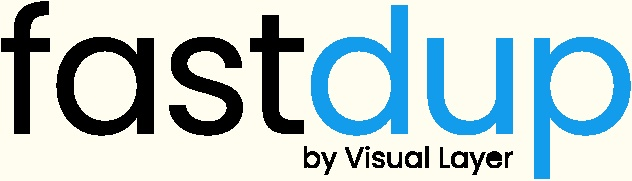
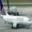
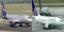
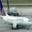
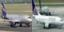
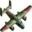
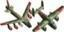
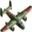
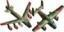
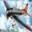
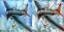
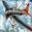
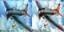
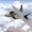
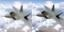
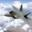
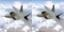
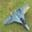
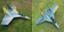
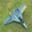
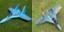
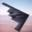
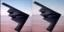
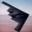
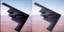
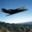
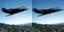
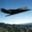
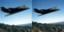
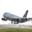
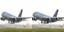
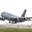
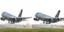
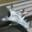
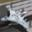
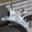
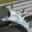
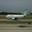
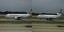
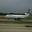
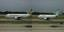

,from,to,distance
2807,cifar10-dataset/airplane/00043292.JPEG,"[cifar10-dataset/airplane/00023786.JPEG, cifar10-dataset/airplane/00030177.JPEG]","[0.981743, 0.929456]"
1541,cifar10-dataset/airplane/00023786.JPEG,"[cifar10-dataset/airplane/00043292.JPEG, cifar10-dataset/airplane/00030177.JPEG]","[0.981743, 0.914067]"
714,cifar10-dataset/airplane/00010713.JPEG,"[cifar10-dataset/airplane/00047689.JPEG, cifar10-dataset/airplane/00020694.JPEG]","[0.981322, 0.943435]"
3103,cifar10-dataset/airplane/00047689.JPEG,"[cifar10-dataset/airplane/00010713.JPEG, cifar10-dataset/airplane/00020694.JPEG]","[0.981322, 0.938593]"
2121,cifar10-dataset/airplane/00032931.JPEG,"[cifar10-dataset/airplane/00008313.JPEG, cifar10-dataset/airplane/00032346.JPEG]","[0.973846, 0.969146]"
...,...,...,...
617,cifar10-dataset/airplane/00009287.JPEG,[cifar10-dataset/airplane/00002035.JPEG],[0.900115]
187,cifar10-dataset/airplane/00002962.JPEG,[cifar10-dataset/airplane/00018102.JPEG],[0.900113]
2557,cifar10-dataset/airplane/00039606.JPEG,[cifar10-dataset/airplane/00010804.JPEG],[0.900052]
956,cifar10-dataset/airplane/00014499.JPEG,[cifar10-dataset/airplane/00047557.JPEG],[0.900018]


In [8]:
fd.vis.similarity_gallery()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40603.14it/s]

Stored outliers visual view in  report/galleries/outliers.html



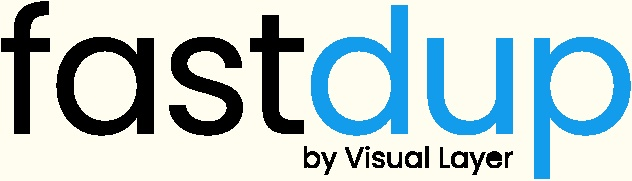
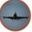
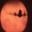
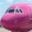
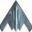
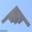
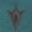
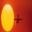
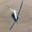
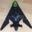
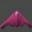
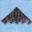
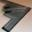
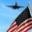
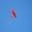
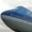
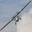
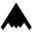
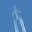
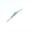
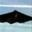

In [9]:
fd.vis.outliers_gallery()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2808.94it/s]

Finished OK. Components are stored as image files report/galleries/components_[index].jpg
Stored components visual view in  report/galleries/components.html
Execution time in seconds 0.3



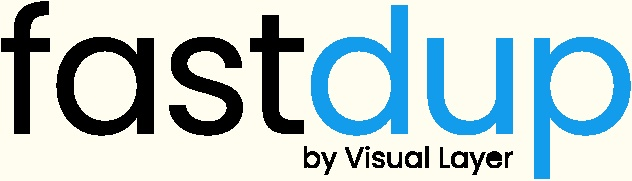
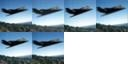
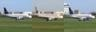
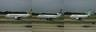
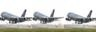
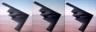
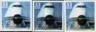
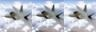
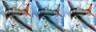
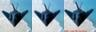
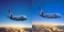
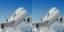
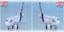
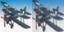
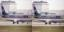
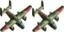
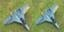
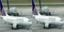
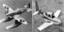
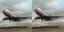
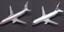

In [10]:
fd.vis.component_gallery()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 462.50it/s]

Stored similarity visual view in  report/galleries/duplicates.html



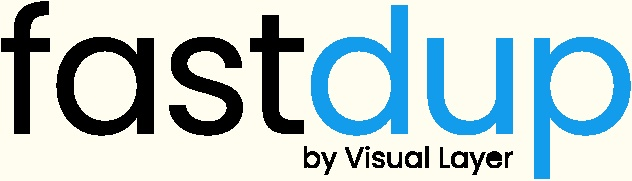
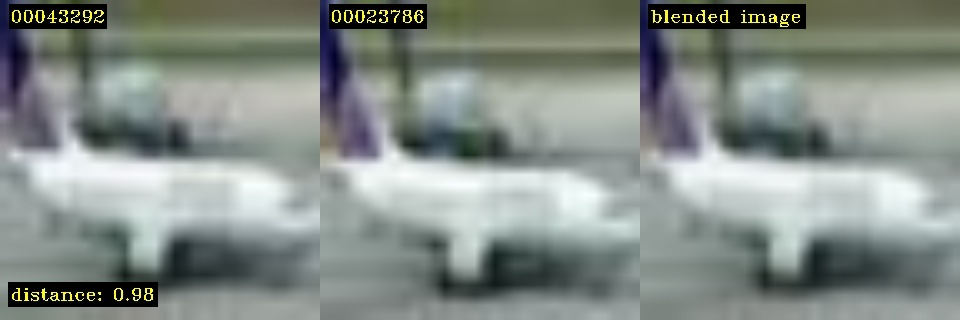
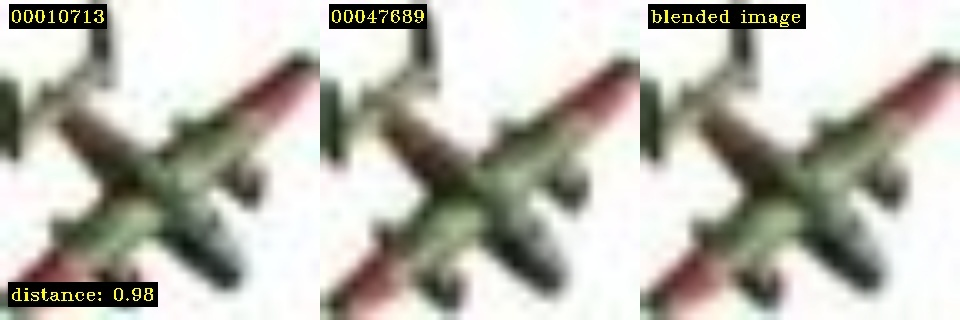
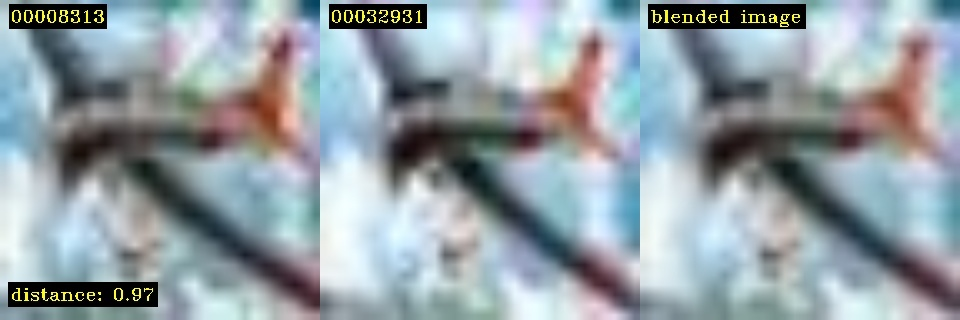
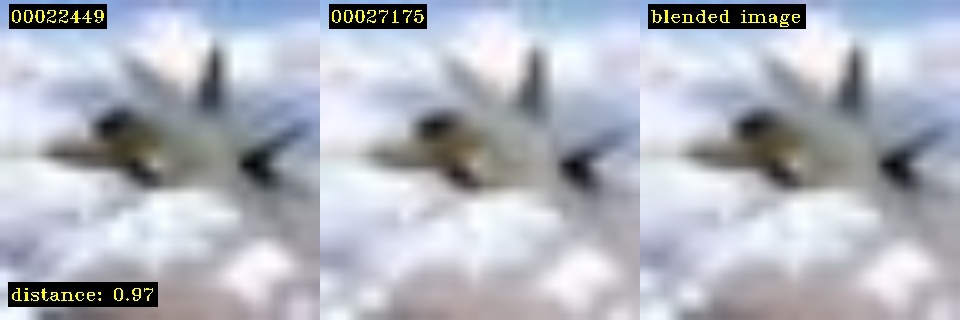
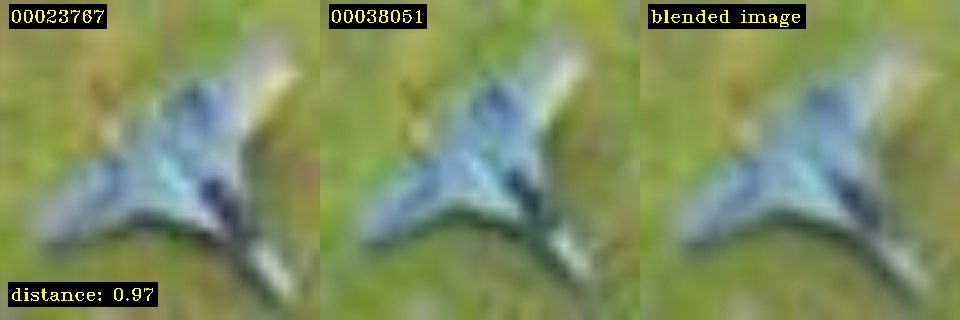
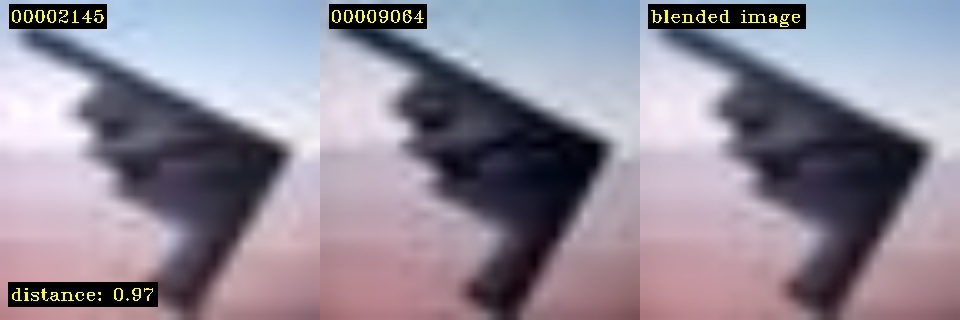
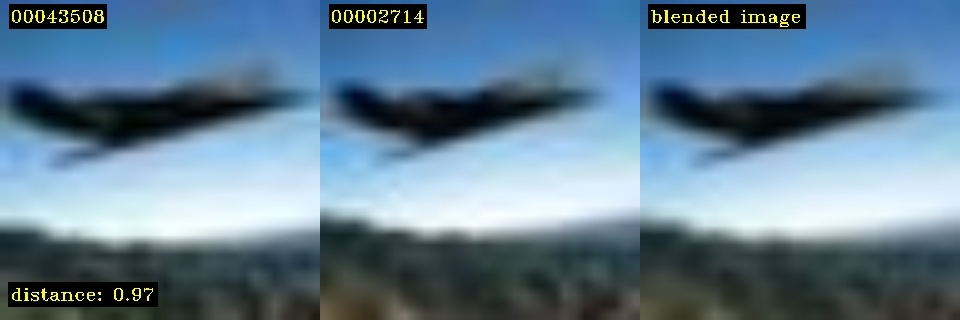
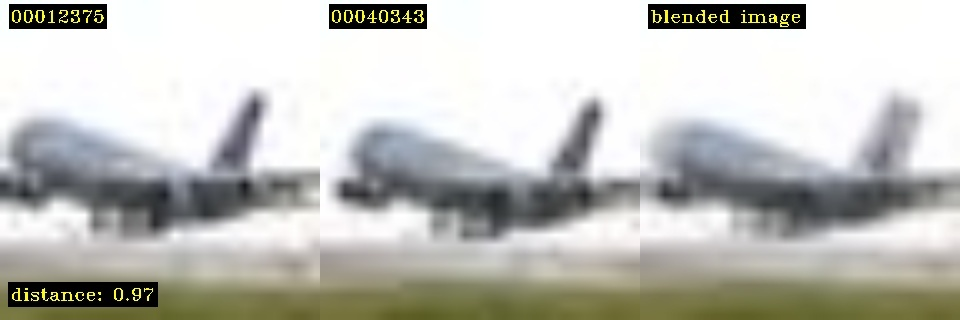
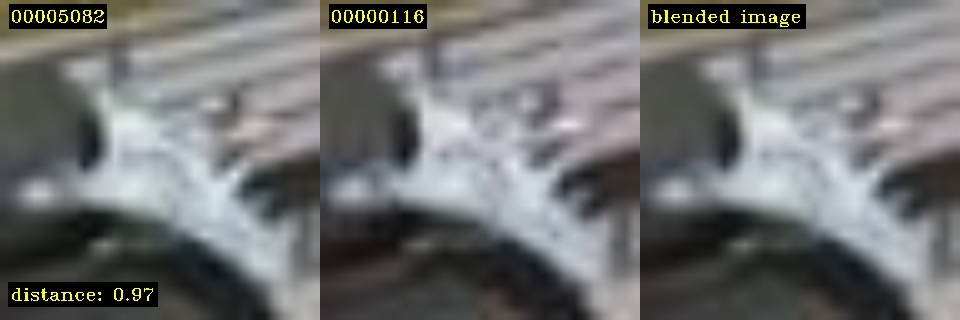
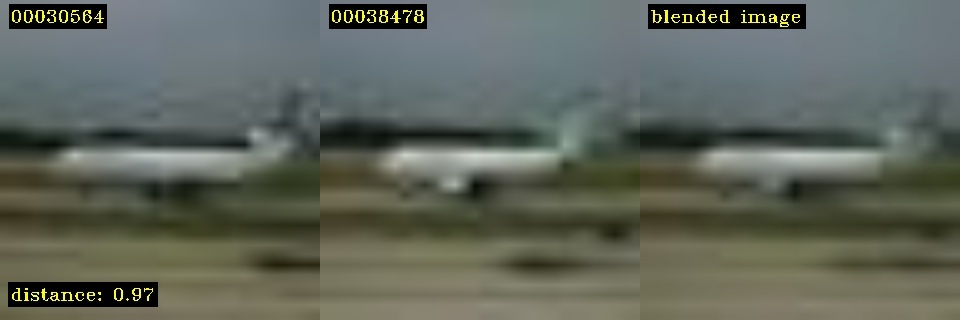

In [11]:
fd.vis.duplicates_gallery()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 6801.76it/s]

Stored mean visual view in  report/galleries/mean.html



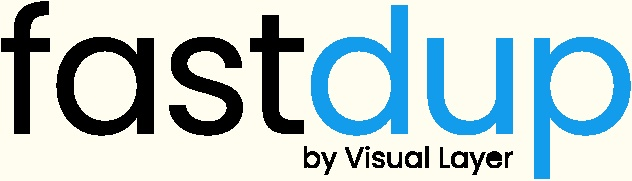
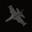
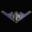
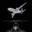
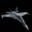
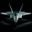
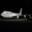
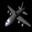
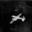
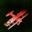
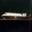
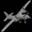
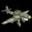
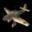
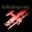
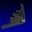
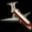
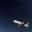
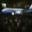
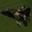
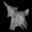

In [12]:
fd.vis.stats_gallery(metric='dark')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 6779.22it/s]


Stored mean visual view in  report/galleries/mean.html



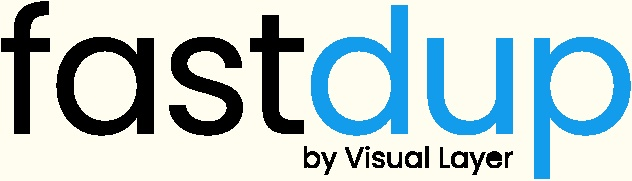
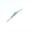
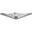
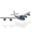
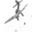
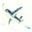
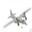
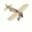
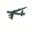
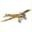
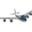
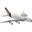
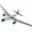
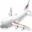
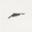
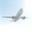
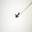
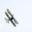
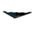
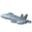
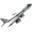

In [13]:
fd.vis.stats_gallery(metric='bright')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 7352.62it/s]


Stored blur visual view in  report/galleries/blur.html



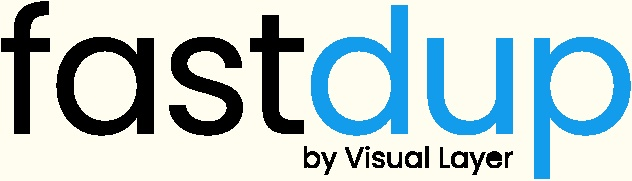
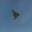
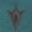
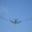
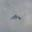
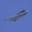
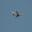
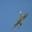
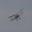
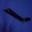
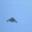
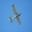
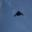
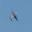
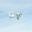
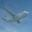
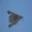
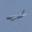
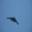
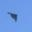
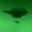

In [14]:
fd.vis.stats_gallery(metric='blur')